<a href="https://www.kaggle.com/code/arinjaypathak/94-accuracy-with-voting-classifier?scriptVersionId=110231015" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
df=pd.read_csv("/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv")
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [4]:
print(df["name"].nunique())
print(df["id"].nunique())

27423
27423


In [5]:
df.drop("name",axis=1,inplace=True)
df.set_index("id",inplace=True)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

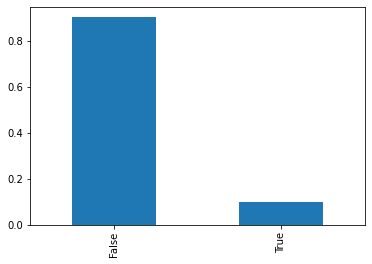

In [7]:
df["hazardous"].value_counts(normalize=True).plot(kind="bar")

In [8]:
df["orbiting_body"].unique()

array(['Earth'], dtype=object)

In [9]:
df["sentry_object"].unique()

array([False])

In [10]:
df.drop(["orbiting_body","sentry_object"],axis=1,inplace=True)
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,,,,,,
2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [11]:
df["hazardous"]=df["hazardous"].astype("int")
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,,,,,,
2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


<AxesSubplot:xlabel='hazardous', ylabel='relative_velocity'>

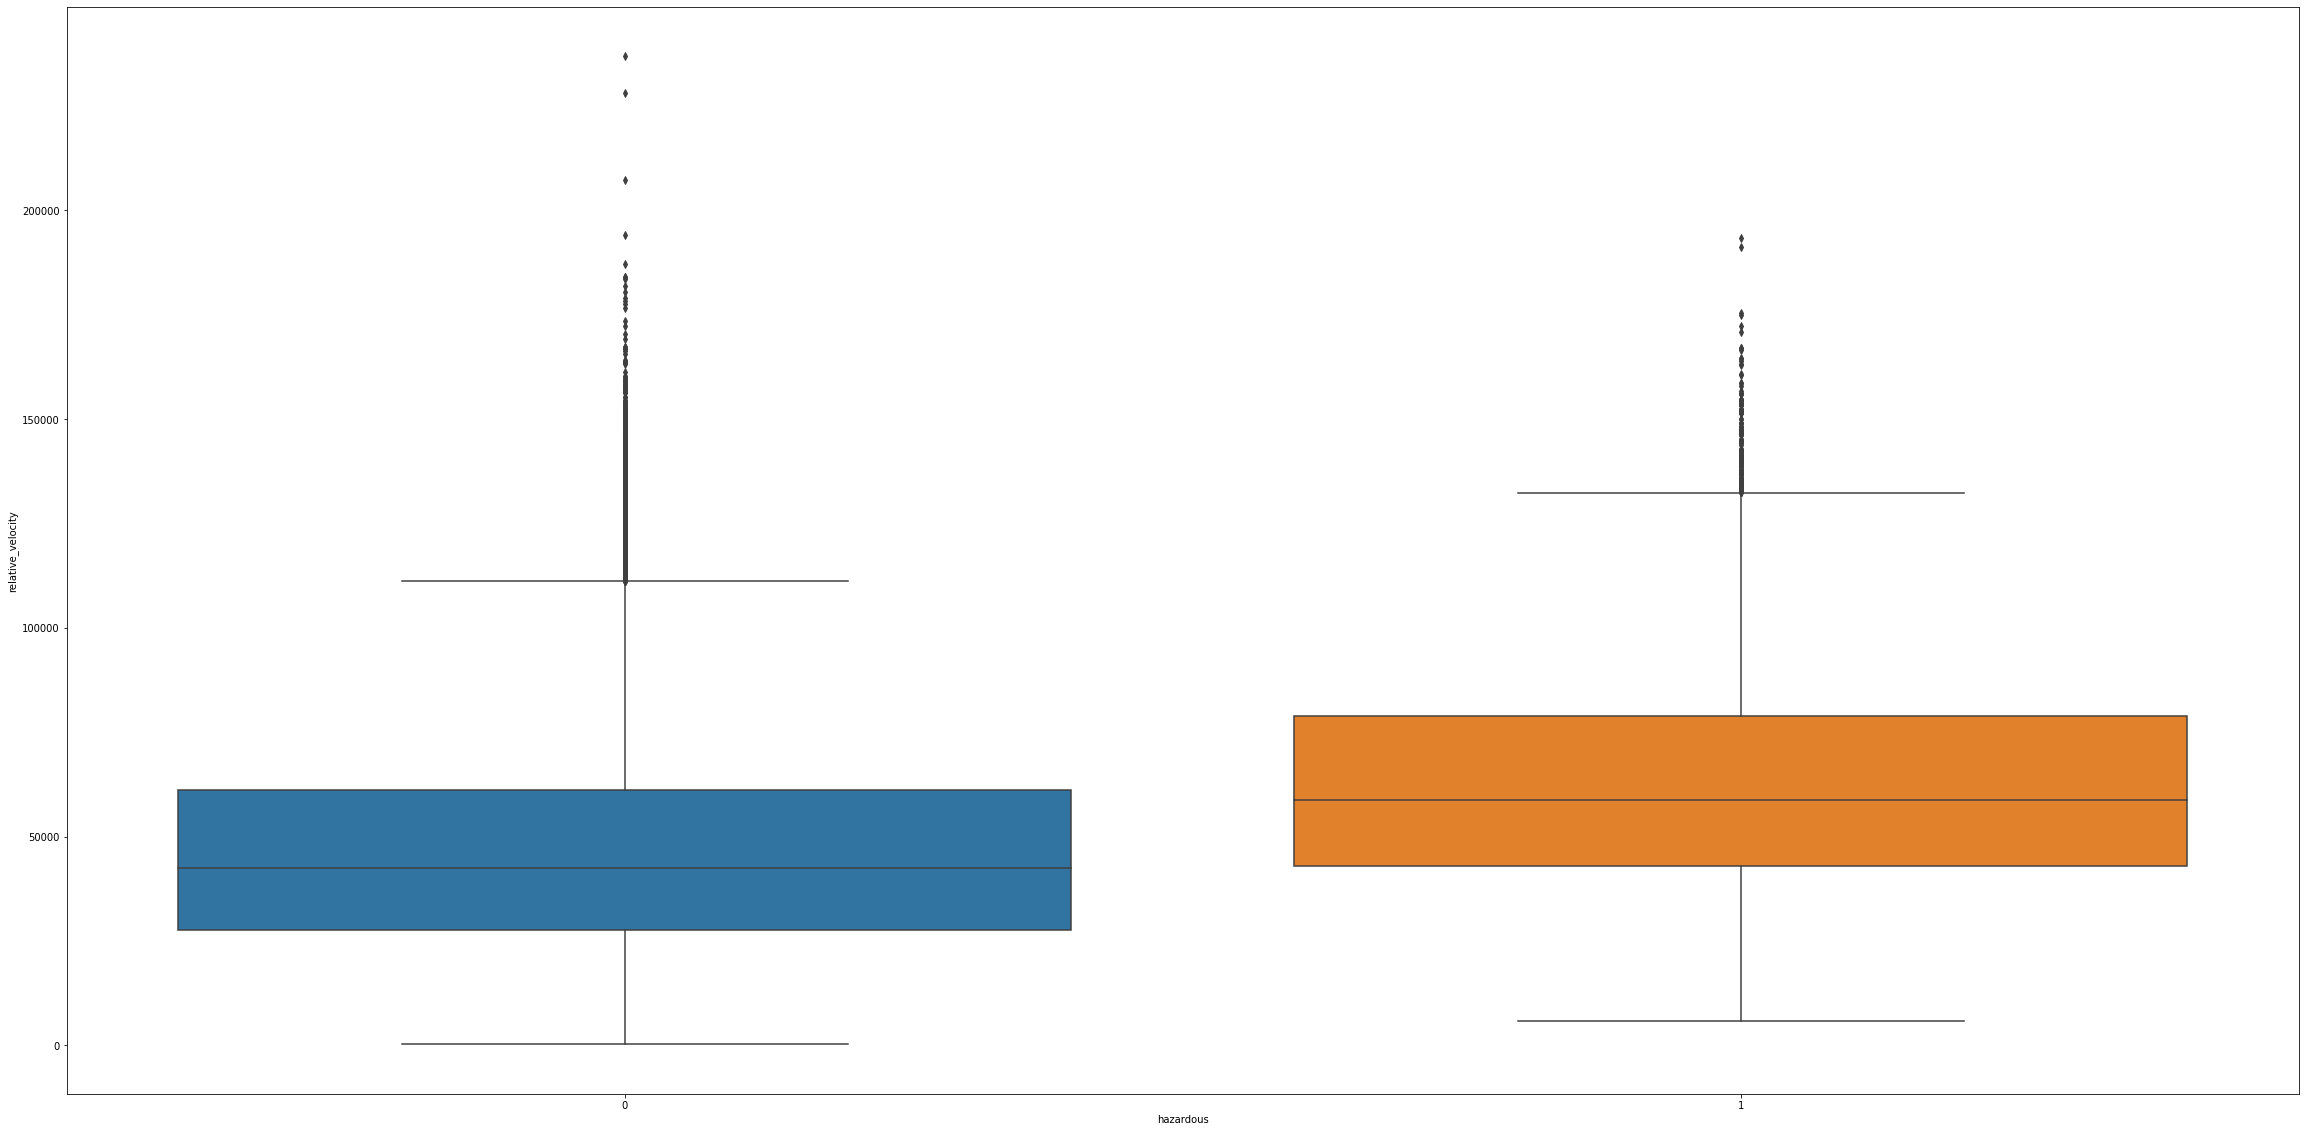

In [12]:
plt.figure(figsize=(40,20))
sns.boxplot(x=df["hazardous"],y=df["relative_velocity"])

In [13]:
df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103,0.097318
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086,0.296392
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000,0.000000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000,0.000000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000,0.000000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000,0.000000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000,1.000000


<AxesSubplot:>

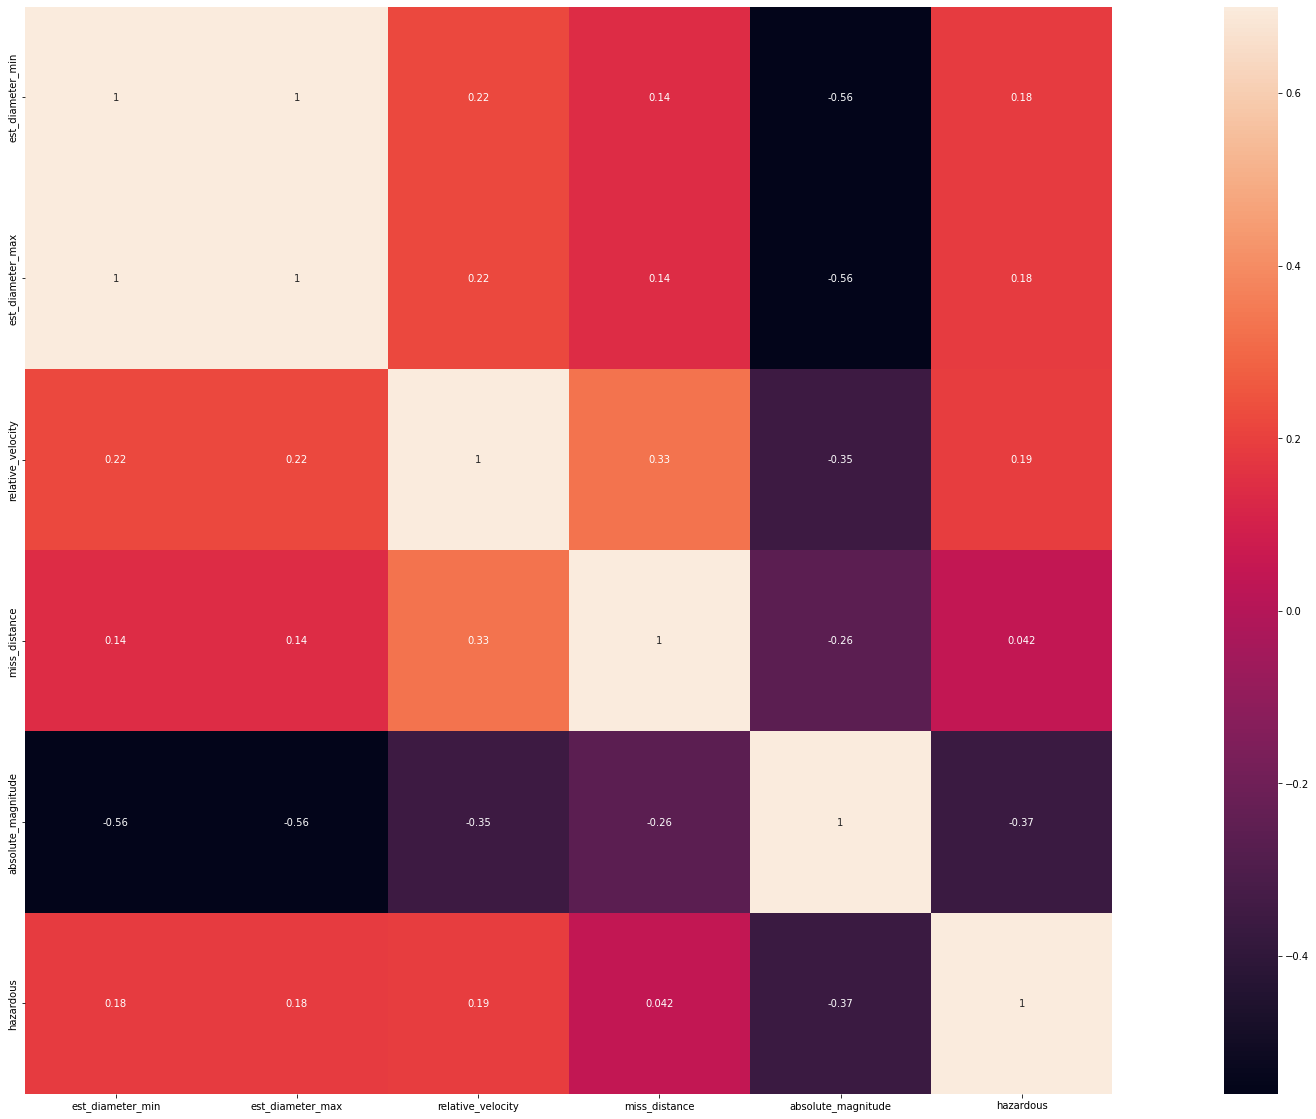

In [14]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),square=True,annot=True,vmax=0.7)

In [15]:
df.drop("est_diameter_min",axis=1,inplace=True)
df.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,,,,,
2162635,2.679415,13569.249224,5.483974e+07,16.73,0
2277475,0.594347,73588.726663,6.143813e+07,20.00,1
2512244,1.614507,114258.692129,4.979872e+07,17.83,0
3596030,0.215794,24764.303138,2.543497e+07,22.20,0
3667127,0.570217,42737.733765,4.627557e+07,20.09,1


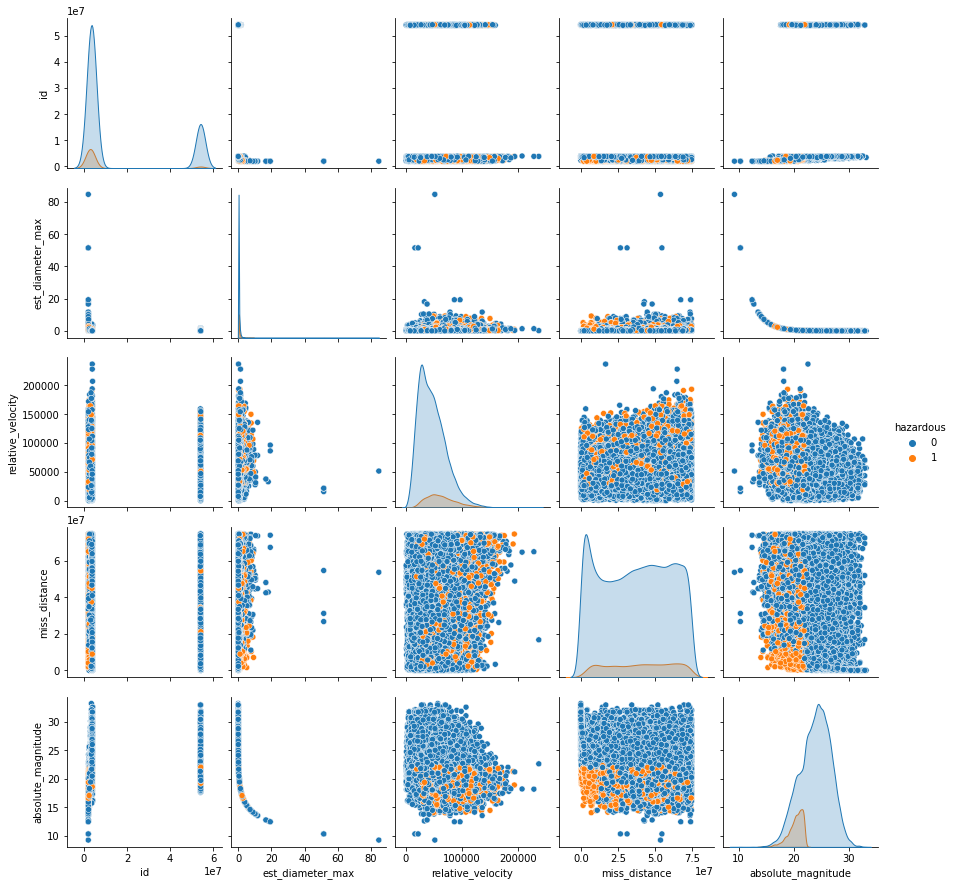

In [16]:
df_new = df.copy()
df_new.reset_index(inplace = True)
sns.pairplot(df_new, hue = "hazardous")

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [19]:
sm=SMOTE(random_state=0)
X_res,Y_res=sm.fit_resample(X,Y)
print(sum(Y_res==1))
print(sum(Y_res==0))

81996
81996


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.2,random_state=10,stratify=Y_res)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(131193, 4) (131193,) (32799, 4) (32799,)


In [21]:
X_res.shape

(163992, 4)

In [22]:
Y_res.shape

(163992,)

In [23]:
# X_train_res=x.fit_transform(X_train_res)

0.578462758010915
              precision    recall  f1-score   support

           0       0.63      0.37      0.47     16399
           1       0.56      0.79      0.65     16400

    accuracy                           0.58     32799
   macro avg       0.59      0.58      0.56     32799
weighted avg       0.59      0.58      0.56     32799



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


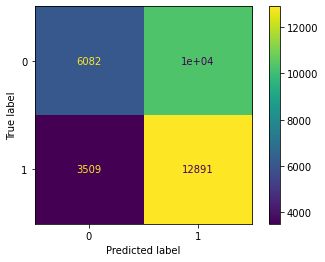

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
model1=LogisticRegression()
model1.fit(X_train,Y_train)
Y_pred1=model1.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(classification_report(Y_test,Y_pred1))
plot_confusion_matrix(model1,X_test,Y_test)

0.787859385956889
              precision    recall  f1-score   support

           0       0.84      0.72      0.77     16399
           1       0.75      0.86      0.80     16400

    accuracy                           0.79     32799
   macro avg       0.79      0.79      0.79     32799
weighted avg       0.79      0.79      0.79     32799



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


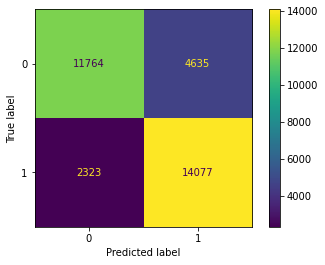

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,Y_train)
Y_pred2=model2.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(classification_report(Y_test,Y_pred2))
plot_confusion_matrix(model2,X_test,Y_test)

0.9470105795908412
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     16399
           1       0.94      0.95      0.95     16400

    accuracy                           0.95     32799
   macro avg       0.95      0.95      0.95     32799
weighted avg       0.95      0.95      0.95     32799



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


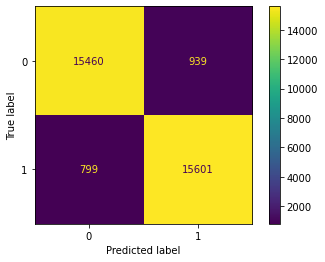

In [26]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(n_estimators=100)
model4.fit(X_train,Y_train)
Y_pred4=model4.predict(X_test)
print(accuracy_score(Y_test,Y_pred4))
print(classification_report(Y_test,Y_pred4))
plot_confusion_matrix(model4,X_test,Y_test)

0.9356992591237537
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     16399
           1       0.94      0.94      0.94     16400

    accuracy                           0.94     32799
   macro avg       0.94      0.94      0.94     32799
weighted avg       0.94      0.94      0.94     32799



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


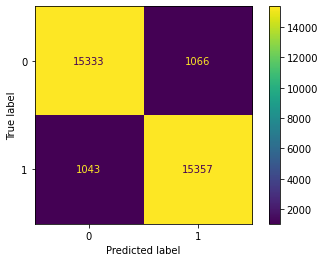

In [27]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train,Y_train)
Y_pred3=model3.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(classification_report(Y_test,Y_pred3))
plot_confusion_matrix(model3,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.62      0.65      0.63     16399
           1       0.63      0.60      0.61     16400

    accuracy                           0.62     32799
   macro avg       0.62      0.62      0.62     32799
weighted avg       0.62      0.62      0.62     32799



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


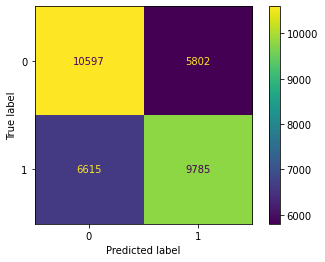

In [28]:
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB()
model5.fit(X_train,Y_train)
Y_pred5=model5.predict(X_test)
print(classification_report(Y_test,Y_pred5))
plot_confusion_matrix(model5,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56     16399
           1       0.56      0.57      0.56     16400

    accuracy                           0.56     32799
   macro avg       0.56      0.56      0.56     32799
weighted avg       0.56      0.56      0.56     32799



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


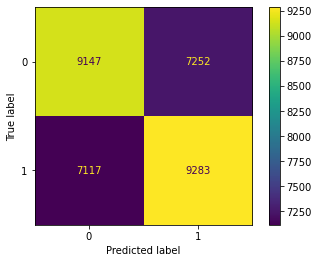

In [29]:
from sklearn.naive_bayes import MultinomialNB
model6=MultinomialNB()
model6.fit(X_train,Y_train)
Y_pred6=model6.predict(X_test)
print(classification_report(Y_test,Y_pred6))
plot_confusion_matrix(model6,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     16399
           1       0.82      0.99      0.90     16400

    accuracy                           0.89     32799
   macro avg       0.91      0.89      0.89     32799
weighted avg       0.91      0.89      0.89     32799



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


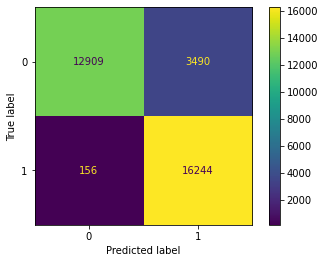

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
model7=GradientBoostingClassifier()
model7.fit(X_train,Y_train)
Y_pred7=model7.predict(X_test)
print(classification_report(Y_test,Y_pred7))
plot_confusion_matrix(model7,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     16399
           1       0.93      0.95      0.94     16400

    accuracy                           0.94     32799
   macro avg       0.94      0.94      0.94     32799
weighted avg       0.94      0.94      0.94     32799



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


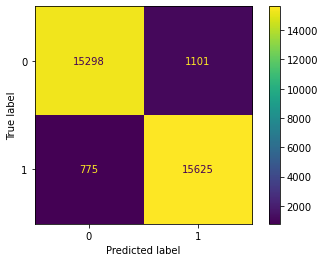

In [31]:
from sklearn.ensemble import VotingClassifier
final=VotingClassifier(estimators=[("rf",model4),("dt",model3),("xgboost",model7)],voting="soft",weights=[3,1,1])
final.fit(X_train,Y_train)
Y_pred_f=final.predict(X_test)
print(classification_report(Y_test,Y_pred_f))
plot_confusion_matrix(final,X_test,Y_test)